# Predicing Titanic Survival


We will be predicting whether a passenger survived or did not surviv

## Import Libraries
To get started, let's import the necessary libraries:







In [53]:
import numpy as np                    
import pandas as pd                  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##  Data
Let's start by reading in the train.csv file into a pandas dataframe.

In [54]:
train = pd.read_csv("dataset/train.csv")
test_data = pd.read_csv("dataset/test.csv") 

In [66]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##  Data Analysis

Let's begin our exploratory data analysis by examining the missing data!


<Axes: >

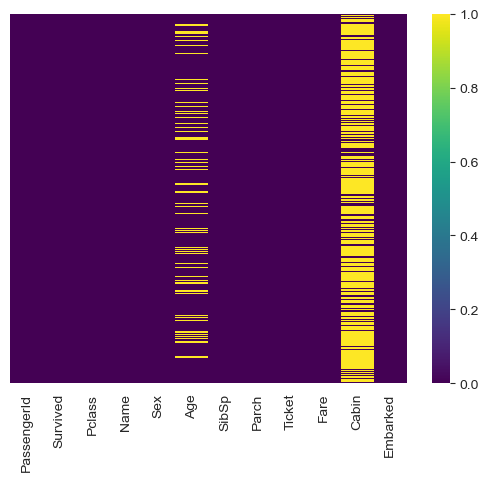

In [67]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

Approximately 20% of the Age data is missing, which is manageable and can be reasonably imputed. However, the Cabin column has too much missing data to be useful, so we will likely drop it or convert it into a feature indicating whether a cabin number is known (1) or unknown (0).

<Axes: xlabel='Survived', ylabel='count'>

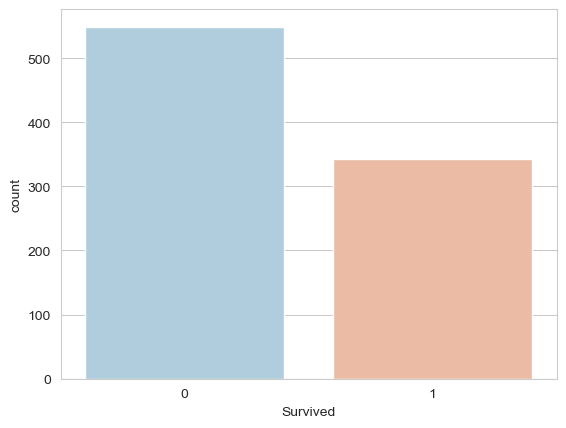

In [68]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

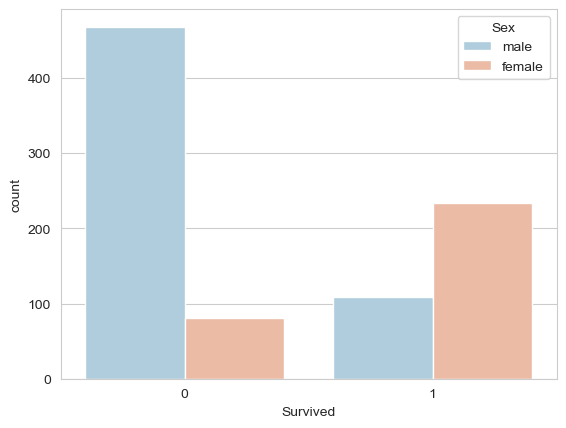

In [69]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

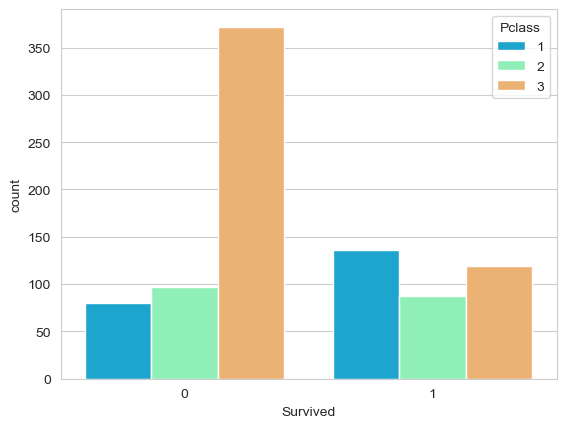

In [70]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

C:\Users\fatim\AppData\Local\Temp\ipykernel_3784\2093911869.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,color='red',bins=30)


<Axes: xlabel='Age'>

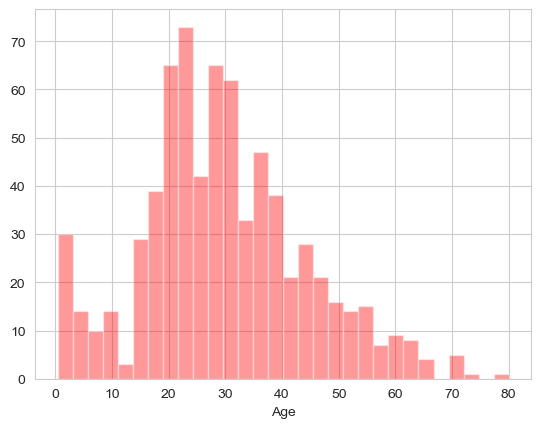

In [78]:
sns.distplot(train['Age'].dropna(),kde=False,color='red',bins=30)

<Axes: >

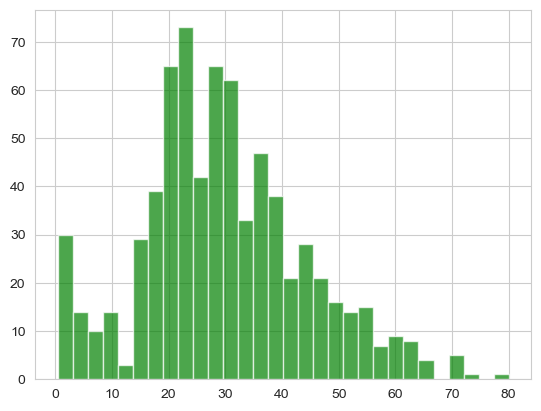

In [75]:
train['Age'].hist(bins=30,color='green',alpha=0.7)

<Axes: xlabel='SibSp', ylabel='count'>

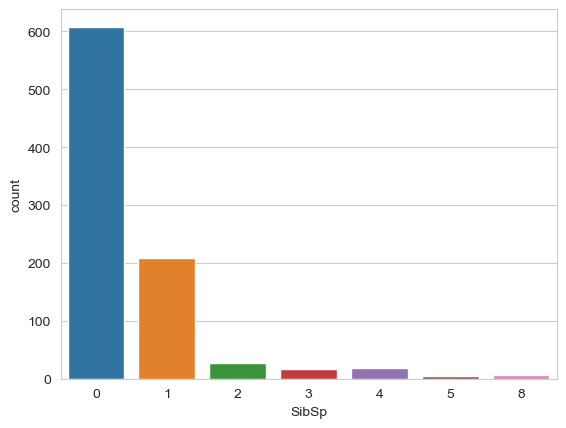

In [45]:
sns.countplot(x='SibSp',data=train)

<Axes: >

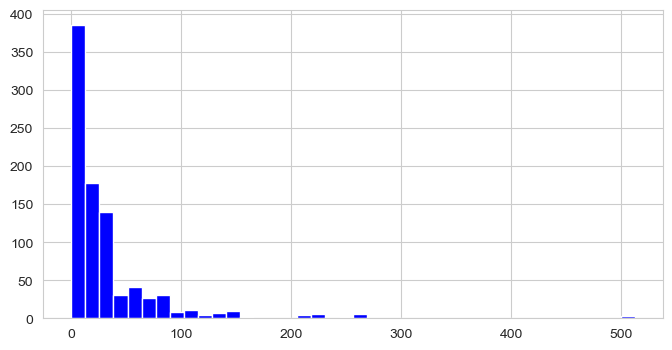

In [74]:
train['Fare'].hist(color='blue',bins=40,figsize=(8,4))

## Data Cleaning


<Axes: xlabel='Pclass', ylabel='Age'>

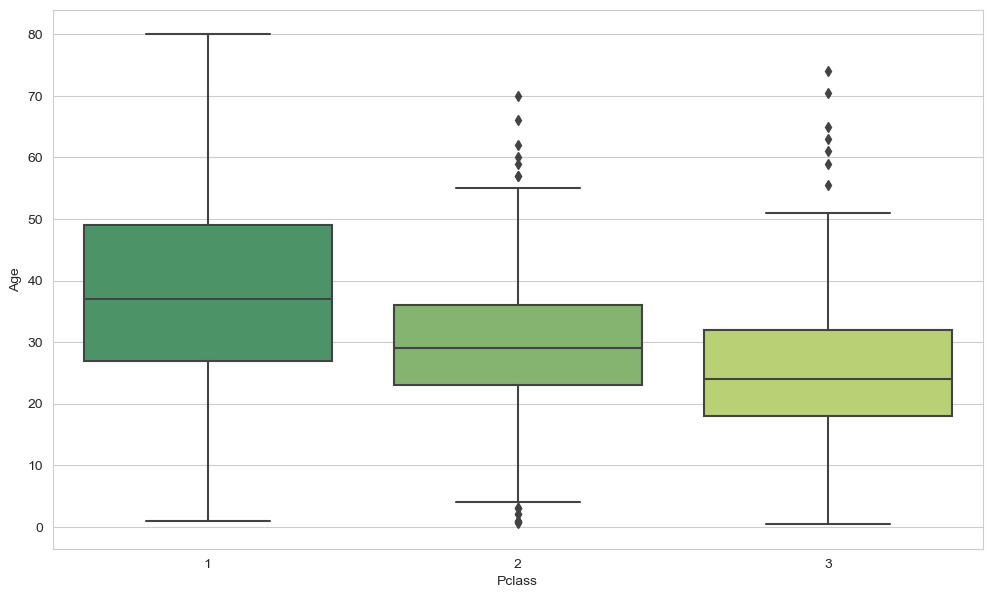

In [73]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='summer')

It's evident that passengers belonging to higher classes, indicating wealthier individuals, tend to have older ages, which is expected. Utilizing these average age values, we will impute the missing Age data based on the passenger class (Pclass).

In [79]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [80]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test_data['Age'] = test_data[['Age','Pclass']].apply(impute_age,axis=1)

 let's revisit the heatmap to see if there are any remaining missing values after our imputation.

<Axes: >

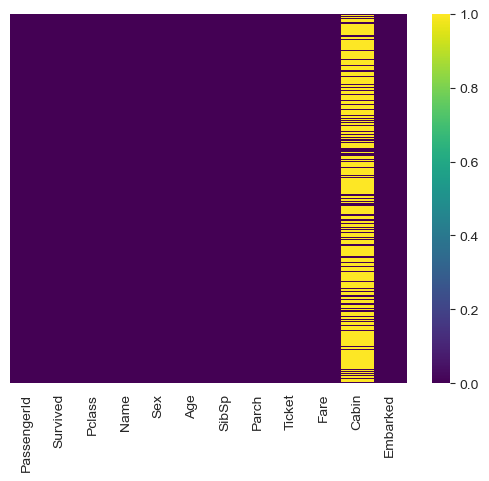

In [82]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

Let's proceed by dropping the Cabin column and removing the row with a missing value in the Embarked column

In [86]:
# Check if 'Cabin' column exists in train DataFrame
if 'Cabin' in train.columns:
    train.drop('Cabin', axis=1, inplace=True)

# Check if 'Cabin' column exists in test_data DataFrame
if 'Cabin' in test_data.columns:
    test_data.drop('Cabin', axis=1, inplace=True)


 ## Converting Categorical Features into Dummy Variables

We need to convert categorical features into dummy variables using pandas. Otherwise, our machine learning algorithm won't be able to directly process those features as inputs.

In [87]:
#train data
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)




In [88]:
# test data
test_sex = pd.get_dummies(test_data['Sex'],drop_first=True)
test_embark = pd.get_dummies(test_data['Embarked'],drop_first=True)
test_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test_data = pd.concat([test_data,test_sex,test_embark],axis=1)


In [89]:
#fill null value of fare column with 0
test_data.Fare.fillna(0 ,inplace = True)

 

## Logistic Regression model


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived', 'PassengerId'], axis=1), 
                                                    train['Survived'], 
                                                    test_size=0.30, 
                                                    random_state=101)


## Training and Predicting

In [97]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\fatim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
predictions = logmodel.predict(X_test)


## Evaluation of the model 




In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [94]:
id = test_data['PassengerId']
predictions = logmodel.predict(test_data.drop('PassengerId', axis=1))
result = pd.DataFrame({ 'PassengerId' : id, 'Survived': predictions })
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [95]:
#writing the output in csv 
result.to_csv('output/titanic-predictions.csv', index = False)